# WBCD dataset: Degeneration effect - repeated avatarization 

In order to look at the effect of an avatarization, we repeat the avatarization on a avatar dataset `k = 20`.  

This notebook visualize avatarization results of the WBCD dataset over iteration.  
To visualize the results, we display the FAMD projection in the original data space of avatars.

## Packages import 

In [1]:
# Main importation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Ellipse
import matplotlib.transforms as transforms
from matplotlib import pyplot as plt
import sys

sys.path.append("../..")
from lsg.dimension import Projection

## Data loading

In [2]:
df = pd.read_csv("../../datasets/WBCD/breast_cancer_wisconsin.csv")
df.drop(columns = "Sample_code_number", inplace = True)
df["iter"] = 0

df = df.astype("category")
df_list = [df]

In [3]:
df_all = pd.read_csv("../../datasets/messageD/wbcd.csv")

In [4]:
df_all.Class = df_all.Class.astype("object")

In [5]:
df_0 = df_all[df_all["iter"] == 0]  # original data
df_1 = df_all[df_all["iter"] == 1]
df_2 = df_all[df_all["iter"] == 2]
df_3 = df_all[df_all["iter"] == 3]
df_5 = df_all[df_all["iter"] == 5]
df_7 = df_all[df_all["iter"] == 7]
df_10 = df_all[df_all["iter"] == 10]

df_0.drop(columns = "iter", inplace = True)
df_1.drop(columns = "iter", inplace = True)
df_2.drop(columns = "iter", inplace = True)
df_3.drop(columns = "iter", inplace = True)
df_5.drop(columns = "iter", inplace = True)
df_7.drop(columns = "iter", inplace = True)
df_10.drop(columns = "iter", inplace = True)

## Graphical parameters

In [6]:
colors = pd.read_csv("../../color.csv", index_col = 0)

## Multdimensionnal projection function: requiered dimension projection local function.

This section use projection function (such as FAMD) to projecte the avatar data in the original data space.

In [11]:
def projection_plot(records_set, avatars_set, variable_visualization, iter, colors = colors) :

    # perform projection
    pr = Projection()
    __, mod = pr.fit_transform(records_set, nf = 2)
    avat_coordinates = mod.transform(avatars_set)
    var1 = pr.model.explained_variance_ratio[0] * 100
    var2 = pr.model.explained_variance_ratio[1] * 100

    avat_coordinates["modality"] = avatars_set[variable_visualization].values

    # general set up 
    paper_rc = {"lines.markersize": 11}
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale = 2, rc = paper_rc)
    with plt.style.context("seaborn-whitegrid"):
        plt.rcParams["axes.edgecolor"] = "0.15"
        plt.rcParams["axes.linewidth"] = 1.25
        plt.rcParams["font.family"] = "sans-serif"
        plt.rcParams["font.sans-serif"] = ["Helvetica"]
        fig = plt.figure(figsize = (10, 7))  # create a figure object
        ax1 = fig.add_subplot()

    # add scatterplot
    ax1 = sns.scatterplot(
        x = "Dim. 1",
        y = "Dim. 2",
        data = avat_coordinates,
        hue = "modality",
        alpha = 1,
        size = 0.5,
        palette = [colors.loc["benign", "color"], colors.loc["malignant", "color"]],
        edgecolor = "#1D1D1B",
    )
    
    # setup x, y limits, labs and legend
    ax1.set_xlim(avat_coordinates["Dim. 1"].min() - 0.2, avat_coordinates["Dim. 1"].max() + 0.2)
    ax1.set_ylim(avat_coordinates["Dim. 2"].min() - 0.2, avat_coordinates["Dim. 2"].max() + 0.2)
    plt.xlabel("Dim. 1 (" + str(round(var1, 2)) + "%)")
    plt.ylabel("Dim. 2 (" + str(round(var2, 2)) + "%)")
    ax1.set(xlim = (-3, 7.5))
    ax1.set(ylim = (-2.2, 4.9))

    #handles, _ = ax1.get_legend_handles_labels()
    #plt.legend(loc = "upper left", labels = ["Benign", "Malignant"], handles = handles[:])
    ax1.get_legend().remove()

    ax1.set_title("Iteration: {}".format(iter))
    return ax1

## Iterations vizualisation

Here we iterate the visualization over avatar generations.

Regarding variables types, a FAMD is performed for dimension reduction


<Figure size 720x504 with 0 Axes>

<Figure size 432x288 with 0 Axes>

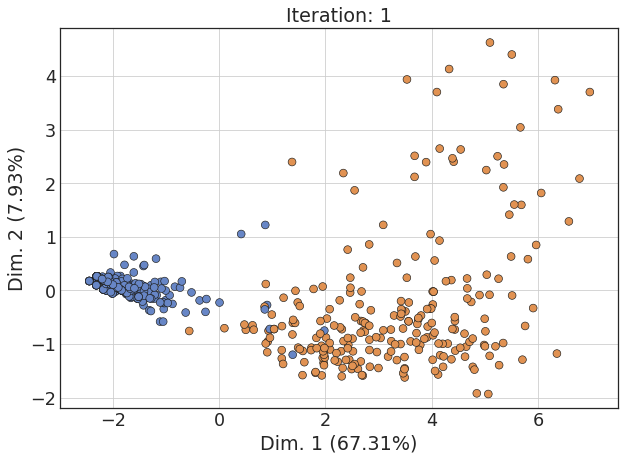

Regarding variables types, a FAMD is performed for dimension reduction


<Figure size 432x288 with 0 Axes>

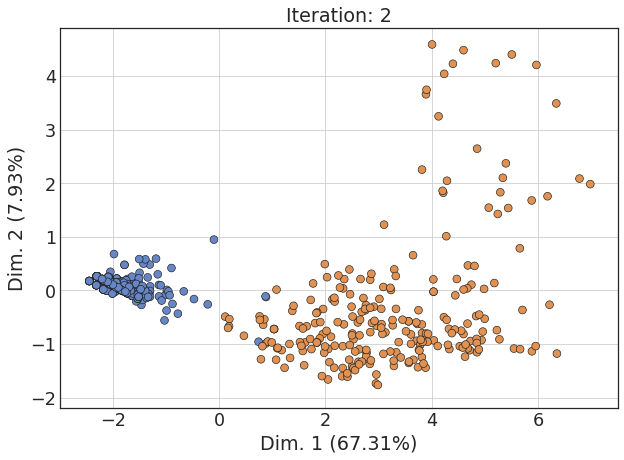

Regarding variables types, a FAMD is performed for dimension reduction


<Figure size 432x288 with 0 Axes>

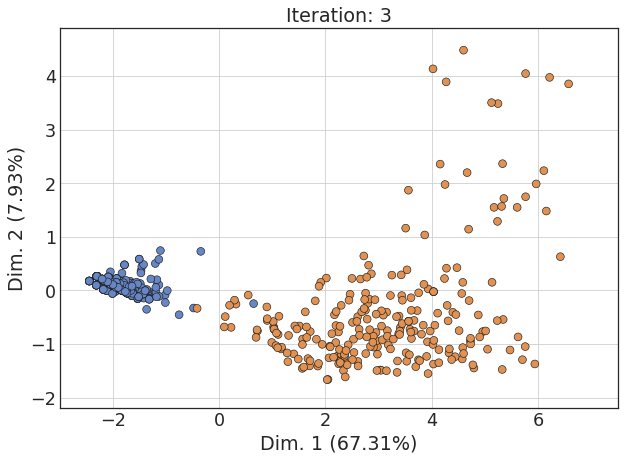

Regarding variables types, a FAMD is performed for dimension reduction


<Figure size 432x288 with 0 Axes>

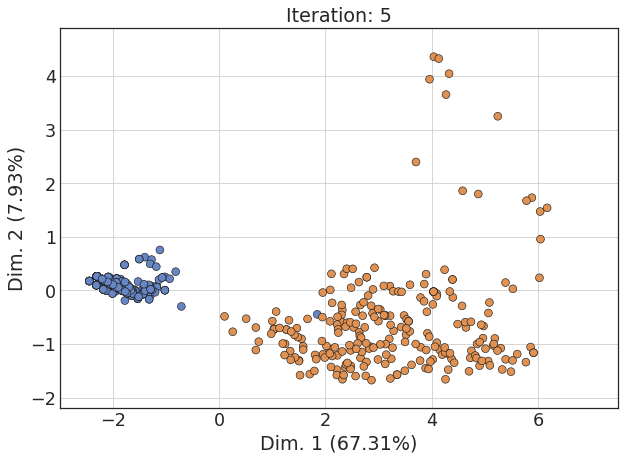

Regarding variables types, a FAMD is performed for dimension reduction


<Figure size 432x288 with 0 Axes>

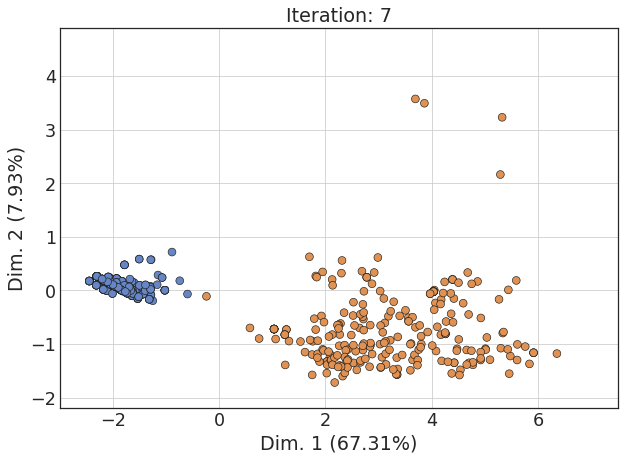

Regarding variables types, a FAMD is performed for dimension reduction


<Figure size 432x288 with 0 Axes>

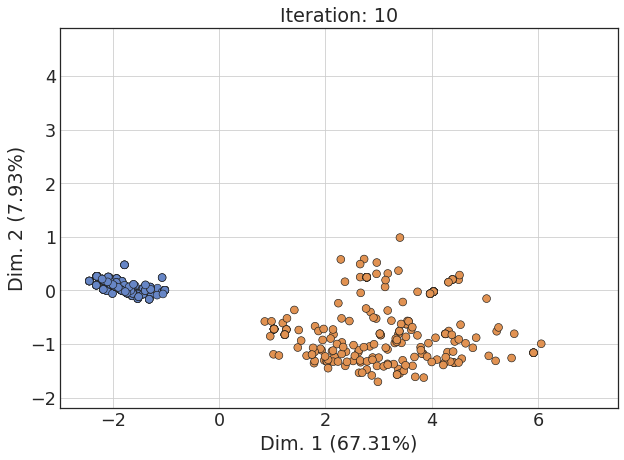

In [15]:
plt.figure(figsize = (10, 7))

list = [(df_1, 1),
        (df_2, 2),
        (df_3, 3),
        (df_5, 5),
        (df_7, 7),
        (df_10, 10)]
for df_temp in list:
    plt.figure()
    projection_plot(df_0, df_temp[0], "Class", df_temp[1])
    plt.savefig("../../figure/wbcd_MESSAGED/wbcd_iteration_{}.svg".format(df_temp[1]), format = "svg", dpi = 600)
    plt.show()
